# Programming Assignment 1
* CSCI-4930 Spring 2019
* Author: Sumner Bradley

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [12]:
import csv
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### TASK 2: Load the dataset into memory so that you can play with it here

In [13]:
file = pd.read_csv('baby-weights-dataset2.csv')

weights = file['BWEIGHT']
print(file.head())

     ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  ...  \
0  2001    2        1    33      26      10    34     12      4       2  ...   
1  2002    2        2    19      40      10    18     11     12       1  ...   
2  2003    2        1    33      16      14    31     16     16       2  ...   
3  2004    1        1    25      40      15    28     12     12       3  ...   
4  2005    1        2    21      60      13    20     12     14       2  ...   

   HYPERCH  HYPERPR  ECLAMP  CERVIX  PINFANT  PRETERM RENAL RHSEN  UTERINE  \
0        0        0       0       0        0        0     0     0        0   
1        0        0       0       0        0        0     0     0        0   
2        0        0       0       0        0        0     0     0        0   
3        0        0       0       0        0        0     0     0        0   
4        0        1       0       0        0        0     0     0        0   

   BWEIGHT  
0   4.3750  
1   6.9375  
2   8.5000 

### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [14]:
print("Max =", np.amax(weights))

print("Min =", np.min(weights))

print("StDev =", np.std(weights))

print("25% =", np.percentile(weights, 25))

print("Median =", np.median(weights))

print("75% =", np.percentile(weights, 75))

Max = 13.0625
Min = 0.1875
StDev = 1.3294541253578183
25% = 6.625
Median = 7.375
75% = 8.0625


### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


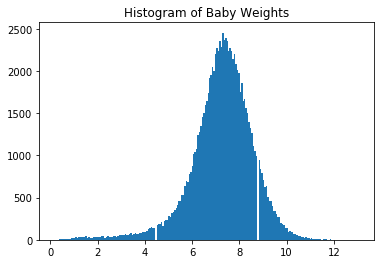

In [15]:
plt.hist(weights,bins="auto")
plt.title("Histogram of Baby Weights")
plt.show()

### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

In [16]:
print("Skew =", skew(weights))

print("Kurtosis =", kurtosis(weights))

Skew = -0.9365796191651633
Kurtosis = 2.868579195051929


### TASK 6: Do variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

In [141]:
relation = []
core = file.corr()['BWEIGHT'].sort_values(ascending = False)

print(core)

for i in range(0, len(core) - 1):
    if abs(core[i]) < 0.1:
        core[i]
        relation.append(i)

print(relation)

BWEIGHT      1.000000
WEEKS        0.565376
GAINED       0.173262
VISITS       0.129587
MAGE         0.068473
PINFANT      0.067073
MEDUC        0.055908
FEDUC        0.052673
FAGE         0.051447
HISPMOM_M    0.031405
HISPDAD_M    0.024415
DIABETES     0.010216
TOTALP       0.003201
ID           0.003001
HISPMOM_S    0.002801
RHSEN        0.001985
HERPES       0.001442
HISPDAD_S    0.000731
CARDIAC     -0.000425
HISPMOM_O   -0.000463
HISPMOM_U   -0.002477
HISPDAD_O   -0.002750
HISPDAD_C   -0.003446
HISPMOM_C   -0.003486
ACLUNG      -0.006643
RENAL       -0.007734
HISPDAD_U   -0.008848
DRINKNUM    -0.010207
HISPDAD_P   -0.010593
HEMOGLOB    -0.010994
ANEMIA      -0.011487
HISPMOM_P   -0.015643
HISPDAD_N   -0.017442
HISPMOM_N   -0.023649
TERMS       -0.026878
BDEAD       -0.036611
LOUTCOME    -0.037264
UTERINE     -0.042741
HYPERCH     -0.043561
HYDRAM      -0.050001
CERVIX      -0.066935
ECLAMP      -0.068073
PRETERM     -0.072932
RACEMOM     -0.079893
RACEDAD     -0.084056
CIGNUM    

### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [20]:
file.isnull().sum()

# file = file.replace(0, np.NaN)
# file.head()

ID           0
SEX          0
MARITAL      0
FAGE         0
GAINED       0
VISITS       0
MAGE         0
FEDUC        0
MEDUC        0
TOTALP       0
BDEAD        0
TERMS        0
LOUTCOME     0
WEEKS        0
RACEMOM      0
RACEDAD      0
CIGNUM       0
DRINKNUM     0
ANEMIA       0
CARDIAC      0
ACLUNG       0
DIABETES     0
HERPES       0
HYDRAM       0
HEMOGLOB     0
HYPERCH      0
HYPERPR      0
ECLAMP       0
CERVIX       0
PINFANT      0
PRETERM      0
RENAL        0
RHSEN        0
UTERINE      0
BWEIGHT      0
HISPMOM_C    0
HISPMOM_M    0
HISPMOM_N    0
HISPMOM_O    0
HISPMOM_P    0
HISPMOM_S    0
HISPMOM_U    0
HISPDAD_C    0
HISPDAD_M    0
HISPDAD_N    0
HISPDAD_O    0
HISPDAD_P    0
HISPDAD_S    0
HISPDAD_U    0
dtype: int64

### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [18]:
file = pd.get_dummies(file)
file.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HISPMOM_P,HISPMOM_S,HISPMOM_U,HISPDAD_C,HISPDAD_M,HISPDAD_N,HISPDAD_O,HISPDAD_P,HISPDAD_S,HISPDAD_U
0,2001,2,1,33,26,10,34,12,4,2,...,0,0,0,0,1,0,0,0,0,0
1,2002,2,2,19,40,10,18,11,12,1,...,0,0,0,0,0,1,0,0,0,0
2,2003,2,1,33,16,14,31,16,16,2,...,0,0,0,0,0,1,0,0,0,0
3,2004,1,1,25,40,15,28,12,12,3,...,0,0,0,0,0,1,0,0,0,0
4,2005,1,2,21,60,13,20,12,14,2,...,0,0,0,0,0,1,0,0,0,0


### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [21]:
x_train,x_test = train_test_split(file,test_size=0.2) 
print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))

Training set size: 81120
Testing set size: 20280


### TASK 9.2: On the training dataset, apply a normalization technique

In [22]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)

print("MIN =", x_train.min())
print("MAX =", x_train.max())
print("MEAN =", x_train.mean())

/home/sumner/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sumner/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


MIN = -8.296944781286946
MAX = 180.2355624968186
MEAN = 3.9682551903802034e-17


### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [23]:
x_test = scaler.transform(x_test)

print("MIN =", x_test.min())
print("MAX =", x_test.max())
print("MEAN =", x_test.mean())

MIN = -8.296944781286946
MAX = 63.06558346775776
MEAN = -0.0001662646519356581


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [ ]:
coeffs = np.linalg.inv(scaler_X_train.transpose().dot(X_train)).dot(scaler_X_train.transpose()).dot(y_train)
print(coeffs)

### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).